## <font color='black'>Introduction<font>



Think about how human children learn. As a
parent or teacher you don’t need to show
young children every breed of dog and cat
there is to teach them to recognize dogs and
cats. They can learn from a few examples,
without a lot of explanation, and generalize on
their own. Oh, they might mistakenly call a
Chihuahua “Kitty” the first time they see one,
but you can correct that relatively quickly.

A clustering problem is an unsupervised
learning problem that asks the model to find
groups of similar data points. There are a
number of clustering algorithms currently in
use, which tend to have slightly different
characteristics.

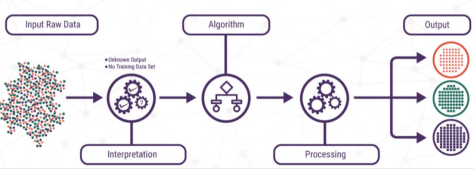

## <font color='black'>K-means clustering<font>



The K-means clustering problem attempts to
divide n observations into k clusters using the
Euclidean distance metric, with the objective of
minimizing the variance (sum of squares)
within each cluster. It is a method of vector
quantization, and is useful for feature learning.

K-means assumes spherical clusters that are
separable so that the mean converges towards
the cluster center, and also assumes that the
ordering of the data points does not matter.
The clusters are expected to be of similar size,
so that the assignment to the nearest cluster
center is the correct assignment.

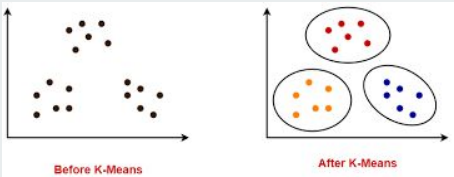

## <font color='black'>Hierarchical Agglomerative clustering<font>



Hierarchical cluster analysis (HCA) can be
agglomerative (you build the clusters
bottom-up starting with individual points and
ending with a single cluster) or divisive (you
start with a single cluster and break it up until
you wind up with individual points). If you’re
lucky you can find an intermediate stage of the
clustering process that reflects a meaningful
classification.

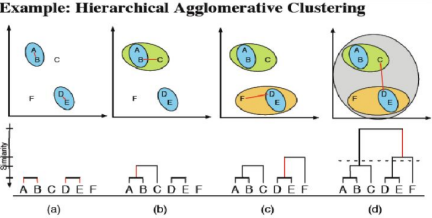

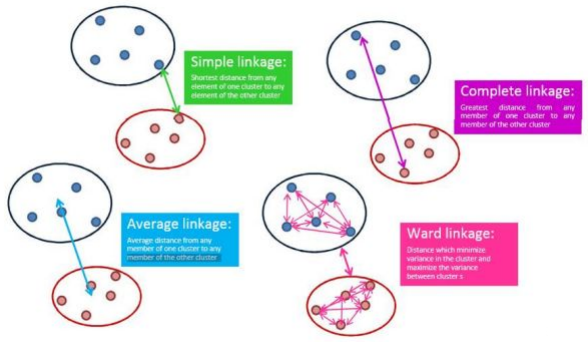

## <font color='black'>DBSCAN clustering<font>



Density-based spatial clustering of applications
with noise (DBSCAN) is a non-parametric
data-clustering algorithm that dates from 1996. It is optimized for use with databases that can accelerate geometric region queries
using an R* tree or some other geometric index structure.

Essentially, DBSCAN clusters core points that
have more than some minimum number of
neighbors within some distance Epsilon,
discards as outliers points that have no
neighbors within Epsilon, and adds points that
are within Epsilon of a core point to that
cluster. DBSCAN is one of the most common
clustering algorithms, and can find arbitrarily
shaped clusters.

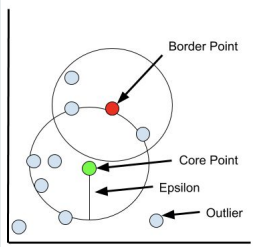

## Comparing algorithms

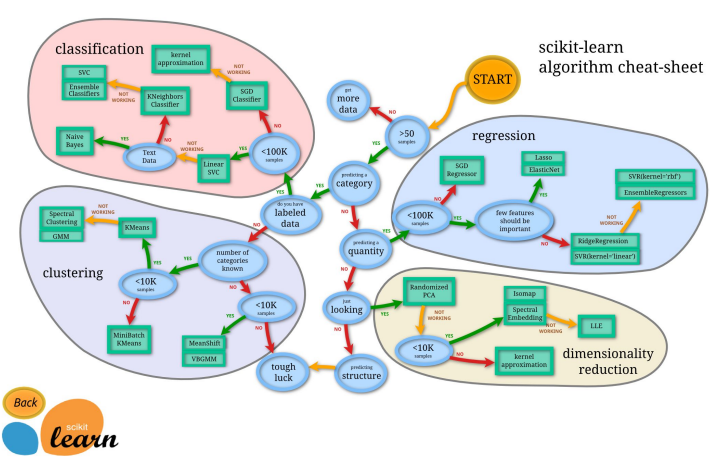

## Comparison

#### K-Means Clustering (MUST scale)
✔ What it assumes
- Clusters are spherical or round
- All clusters have similar size and density
- You know the number of clusters (k) in advance or you can find it easily

✔ Strengths
- Very fast
- Works well for large datasets
- Easy to understand and visualize

✔ Weaknesses
- Must choose k beforehand
- Bad for non-spherical clusters
- Bad for different densities
- Sensitive to outliers
- Sensitive to feature scaling 

✔ Best for:
- Nice, round clusters
- Large datasets
- When k is known



#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) (SHOULD scale)
✔ What it assumes
- Clusters are areas of high density
- Outliers are noise
- The number of clusters is unknown
  
✔ Strengths
- Finds clusters of arbitrary shape (curves, spirals, blobs)
- Does not require k
- Can detect noise/outliers naturally
- Handles clusters of different shapes and sizes
  
✔ Weaknesses
- Harder to choose eps and min_samples
- Struggles with high-dimensional data
- Fails if density varies too much across clusters
  
✔ Best for:
- Non-spherical clusters
- Data with noise
- Unknown number of clusters
- Spatial / geographic data


#### Agglomerative (Hierarchical) Clustering (MUST scale)
✔ What it assumes
- No strict cluster shape assumption
- Clusters can be revealed by merging smaller groups
- Does not require distance to a centroid
  
✔ Strengths
- No need to choose k initially (use dendrogram)
- Works for many shapes (depending on linkage)
- More flexible than K-Means
- Good for small / medium datasets
  
✔ Weaknesses
- Computationally expensive for large datasets
- Still sensitive to noise
- Result depends strongly on linkage method
  
✔ Best for:
- Small/medium datasets
- When you want a hierarchy / tree
- When cluster structure is unclear

## Principal Component Analysis (PCA) (MUST scale)

#### What is PCA?
PCA (Principal Component Analysis) is a mathematical technique used to:
- Reduce the number of features in a dataset
- Keep as much information as possible
- Make high-dimensional data easier to visualize (especially in 2D or 3D)
- Remove noise and correlations between variables
- It is one of the most common dimensionality reduction techniques in Machine Learning.
  
#### Why do we need PCA?
Real datasets often have:
- Many features
- Some features are highly correlated
- Some features add noise
- Hard to visualize data in more than 2 or 3 dimensions
  
#### PCA helps us by:
- Finding the directions of maximum variance
- Compressing the data into fewer dimensions
- Keeping the most important patterns
- Making clustering and other ML tasks easier

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, cdist

## <font color='black'>Code<font>



In [48]:
# KODOT E ZA SITE 3VIDA KMEANS HIERA I DBSCAN
X = np.zeros((150, 2))

np.random.seed(seed=42)                #➡ секој пат кога ќе го стартуваш кодот, ќе добиеш исти точки
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)                   #1 → втора колона (y координата)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50) #50:100 → редови од 50 до 99
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50) #scale=.5 → повеќе растурени од првиот кластер

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)  #Последни 50 точки (кластер 3)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

In [ ]:
"""
Со овој код генерираш 3 јасно одделени кластери во 2D простор, идеални за тестирање на:
K-means
Hierarchical clustering
DBSCAN




X = np.zeros((150, 2))
-----------------
np.zeros → креира нули
(150, 2) → 150 редови (точки), 2 колони (x и y)
➡ X е табела со 150 точки во 2D простор, сите почнуваат како (0, 0)


Први 50 точки (кластер 1)
----------------------------
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
:50 → првите 50 редови
0 → прва колона (x координата)
np.random.normal(...) → генерира 50 броеви од нормална распределба
loc=0.0 → средина = 0
scale=.3 → стандардна девијација (колку се растурени)
size=50 → 50 броеви
"""

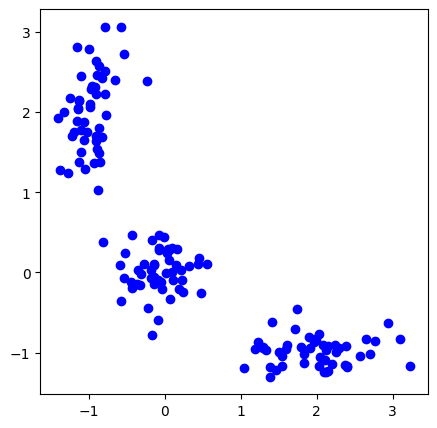

In [49]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

"""
X[:, 0] → сите редови, прва колона → x-координати
X[:, 1] → сите редови, втора колона → y-координати
'bo' значи:
b → blue (сина боја)
o → кругчиња (markers)
"""

In [ ]:
"""
za graf:
Што гледаш?
Сите точки се иста боја → НЕМА кластеринг
Ова се сурови податоци (raw data)
Како се чита?
Визуелно можеш да забележиш 3 природни групи:
Горe лево (околу x ≈ −1, y ≈ 2)
Средина (околу x ≈ 0, y ≈ 0)
Долу десно (околу x ≈ 2, y ≈ −1)
👉 Но компјутерот уште не знае дека се 3 кластери — тоа е само наша визуелна интуиција.


"""

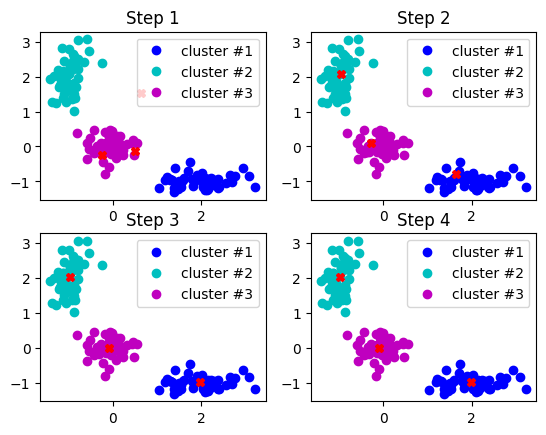

In [50]:
# SAMO ZA KMEANS ,racno
#Note: First, we find the central points in each cluster.

np.random.seed(seed=42) 
centroids = np.random.normal(loc=0.0, scale=1., size=6)    #Генерира 6 случајни броеви од нормална распределба
centroids = centroids.reshape((3, 2))                      #Ги обликува 6-те броеви во 3 реда × 2 колони, Значи: 3 центроиди, секој со (x, y)

cent_history = []                                           #Празна листа
cent_history.append(centroids)                  #Ги зачувува почетните центроиди (Step 1)

for i in range(3):

    #Note: Calculate the distance from a point to a centroid
    distances = cdist(X, centroids)

    #Note: Check what's the closest centroid for each point
    labels = distances.argmin(axis=1)           #го зема најмалиот distance

    #Note: Label the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)    # klaster 0 ,za site tocki prave proserek
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

for i in range(4):
   plt.subplot(2, 2, i + 1)
   plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
   plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
   plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')

   plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
   plt.legend(loc=0)

   plt.title('Step {:}'.format(i + 1))

In [ ]:
"""
ZA GRAFIK:
Што значат боите?Секоја боја = еден кластер
cluster #1, #2, #3 = labels (0,1,2)

Што значат црвените ❌ (X)?Тоа се центроиди (центри на кластерите)

Step 1
Центроидите се случајно поставени
Кластерите не се уште „точни“

Step 2
Точките се прераспределуваат
Центроидите се поместуваат кон средината на своите групи

Step 3
Кластерите веќе личат на вистинските групи
Центроидите скоро не се менуваат

Step 4
Конвергенција
Центроидите се стабилни
Кластерите се јасно одделени

"""

In [ ]:
"""
DA NE E RACNO

K = 6
for k in range(K):
    centroids[k, :] = np.mean(X[labels == k, :], axis=0)

"""


### Determining number of clusters (k)
The Elbow Method helps determine the optimal number of clusters (k) for K-Means by looking at how the inertia (sum of squared distances of points to their cluster centers) changes with k.

As we increase k, clusters become more numerous and compact. Therefore, inertia always decreases.
But at some point, increasing k provides little improvement — like diminishing returns.
The “elbow point” represents the best trade-off between:
- too few clusters (high error)
- too many clusters (overfitting, harder to interpret)
You look for the point where the curve bends — that is the elbow.

What we plot:
- x-axis → number of clusters (k)
- y-axis → inertia (within-cluster sum of squares)
You normally compute inertia for k = 1 to 10.

Interpretation:
- Large drop at small k → clusters are forming
- Curve flattens → adding clusters does not give major improvement
- The bend = optimal k

In [59]:
#Note: We can choose the number of clusters for K-means in this manner.
#Ова важи само за K-means

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

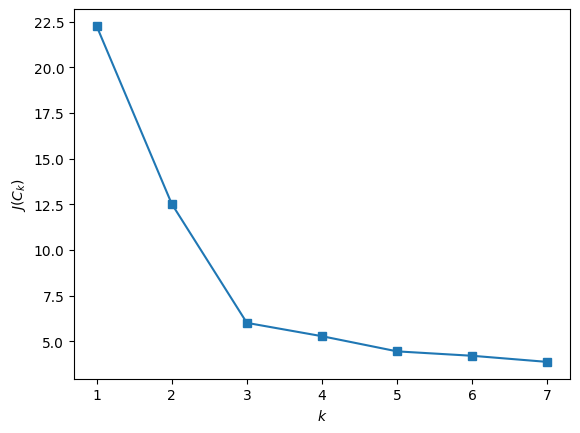

In [60]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

### <font color='black'>Aglomerative Clustering<font>



In [5]:
"""

Ова е Hierarchical clustering

Бројот на кластери се избира со сечење на дендрограмот
"""

'\n\nОва е Hierarchical clustering\n\nБројот на кластери се избира со сечење на дендрограмот\n'

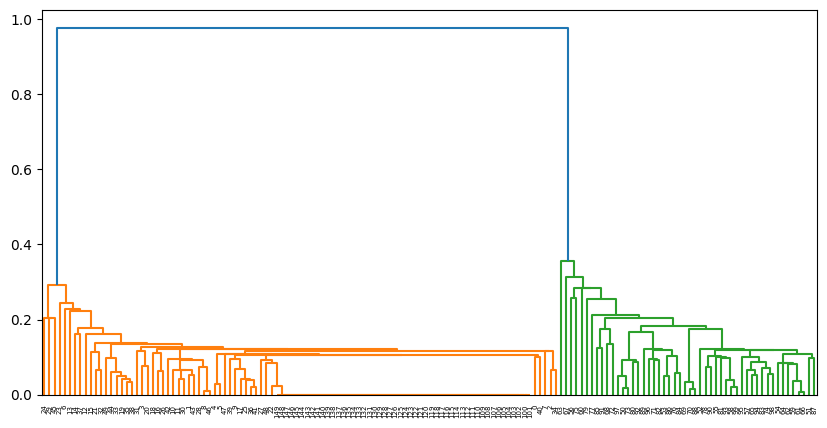

In [24]:
#Note: pdist will calculate the upper triangle of the pairwise distance matrix.
distance_mat = pdist(X) #Растојание меѓу секој пар точки

#Note: linkage is an implementation of the agglomerative algorithm.
Z = hierarchy.linkage(distance_mat, 'single') #matrica za најблиското растојание меѓу било кои две точки

plt.figure(figsize=(10, 5))

dn = hierarchy.dendrogram(Z, color_threshold=0.5)  #➡ Визуелно гледаш каде и како се спојуваат кластерите

### <font color='black'>Comparison of clustering algorithms<font>



In [ ]:
"""
Што точно се споредува?
1. Начин на формирање кластери
K-means → растојание до центроид
Hierarchical → растојание меѓу кластери (дендрограм)
DBSCAN → густина на точки

2. Број на кластери
K-means → мора однапред
Hierarchical → се избира со дендрограм
DBSCAN → се добива автоматски

3. Форма на кластери
K-means → сферични
Hierarchical → различни
DBSCAN → произволни форми

4. Outliers (шум)
K-means → ❌ не
Hierarchical → ❌ не
DBSCAN → ✅ да

5. Скалирање и брзина

K-means → многу брз

Hierarchical → бавен

DBSCAN → среден
"""

In [ ]:
#dole e za site nema vrska so kmean hier i dbscan

In [62]:
data = datasets.load_digits()
X, y = data.data, data.target
#„Кодот го вчитува digits dataset, каде X ги содржи пиксел-вредностите на сликите, а y ги содржи вистинските класи (цифри).“

In [63]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [64]:
y

array([0, 1, 2, ..., 8, 9, 8])

### Measurements

#### ARI (Adjusted Rand Index)
##### What it measures
- How similar the clustering is to the true labels, based on pairwise agreements.
##### How it measures  
- It checks every pair of points:
   - Are they in the same cluster in the ground truth?
   - Are they in the same cluster in the predicted labels?
   - ARI counts agreements and adjusts for chance.
##### Range
- +1 → perfect clustering
- 0 → random clustering
- Negative → worse than random

#### AMI (Adjusted Mutual Information)
##### What it measures
- How much information the clustering shares with the true labels.
- Mutual information = “how much knowing one label reduces uncertainty about the other.” AMI adjusts this for chance.
##### Range
- 1 → perfect labeling
- 0 → no shared information
- Never negative

#### Homogenity
##### What it measures
A clustering is homogeneous if each cluster contains only members of a single true class.
In other words: “Clusters should not mix classes.”
##### Range
- 0 → completely mixed
- 1 → each cluster contains only one class

#### Completeness
##### What it measures
A clustering is complete if all members of the same class are assigned to the same cluster.
In other words: “Classes should not be split across multiple clusters.”
##### Range
- 0 → a class is scattered across many clusters
- 1 → each class is entirely within a single cluster

#### V-measure
##### What it measures
- The harmonic mean of homogeneity and completeness.
##### Range
- 0 → bad
- 1 → perfect
##### Why harmonic mean?
It forces both homogeneity and completeness to be high — you cannot score well by maximizing only one.
Similar to the F1-score in classification.
##### When to use V-measure?
When you want balance between “pure clusters” (homogeneity) and “complete classes” (completeness).
A general-purpose evaluation metric for labeled clustering.

In [ ]:
"""
| Алгоритам        | Најдобри мерки   |
| ---------------- | ---------------- |
| K-Means          | **ARI, AMI**     |
| DBSCAN           | **ARI, AMI**     |
| Hierarchical     | **ARI, AMI**     |
| Анализа / резиме | **V-measure**    |
| Чистота          | **Homogeneity**  |
| Комплетност      | **Completeness** |

"""

In [66]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())   #сам си одредува број на кластери
algorithms.append(SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10)) #hierar
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity','Completeness', 'V-measure'], index=['K-means', 'Affinity', 'Spectral', 'Agglomerative','DBSCAN'])

results

/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:241: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:241: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:241: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_w

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.666618,0.741068,0.741543,0.745751,0.743641
Affinity,0.175115,0.612421,0.958894,0.486865,0.645823
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000


### <font color='black'>Another example<font>

In [4]:
real_estate = pd.read_csv("data/other/real_estate_dataset_mk_missing.csv")
real_estate.head()

,city,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,NaN,80.0,4.0,5.0,2009.0,3.55,150804.0
1,Skopje,92.1,5.0,3.0,2008.0,3.54,178480.0
2,Skopje,97.4,5.0,0.0,2002.0,2.41,168418.0
3,Skopje,49.5,3.0,5.0,2024.0,3.97,90170.0
4,Skopje,NaN,3.0,2.0,NaN,3.75,77454.0


In [5]:
# 2) Select purely numeric features for clustering
num_cols = [
    "area_sq_meters",
    "num_rooms",
    "floor",
    "year_built",
    "distance_from_center_km",
    "price",
]

# Drop rows with missing values in these columns (simple choice for now)
re_numeric = real_estate[num_cols].dropna()

print(re_numeric.shape)
re_numeric.head()

(748, 6)


,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,80.0,4.0,5.0,2009.0,3.55,150804.0
1,92.1,5.0,3.0,2008.0,3.54,178480.0
2,97.4,5.0,0.0,2002.0,2.41,168418.0
3,49.5,3.0,5.0,2024.0,3.97,90170.0
5,80.0,5.0,1.0,2000.0,1.97,130837.0


In [6]:
# 3) Standardize the data za kmeans dbscan hierar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(re_numeric)

X_scaled[:5]

array([[ 0.33509113,  0.27805751,  1.24904936,  0.35373124, -0.03458406,
         1.30021501],
       [ 0.87781379,  1.0483798 ,  0.15246612,  0.26623423, -0.04004393,
         1.94367002],
       [ 1.11553529,  1.0483798 , -1.49240875, -0.25874785, -0.65700957,
         1.70973288],
       [-1.03292881, -0.49226478,  1.24904936,  1.66618642,  0.1947306 ,
        -0.10949924],
       [ 0.33509113,  1.0483798 , -0.94411712, -0.43374187, -0.89724398,
         0.8359909 ]])

In [ ]:
"""
voa dole

🧠 Како да го читаш резултатот?

Ако пишува:

0.60 – 0.80 → многу добро за визуелизација ✅

< 0.5 → губиш многу информација ⚠️

📌 За цртање, 2D е сосема доволно.

❗ ВАЖНО (за K-Means / DBSCAN)

PCA се прави ПО StandardScaler

PCA е за:

визуелизација

забрзување

не е задолжително за clustering, само помага


„PCA ги намалува димензиите на податоците задржувајќи ја најголемата варијанса, а овде се користи за 2D визуелизација.“
"""

In [7]:
# 4) PCA to 2 dimensions so we can visualize
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by PC1+PC2:",
      pca.explained_variance_ratio_.sum().round(3))

Explained variance by PC1+PC2: 0.597


/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:341: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:341: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:341: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ana/Library

/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


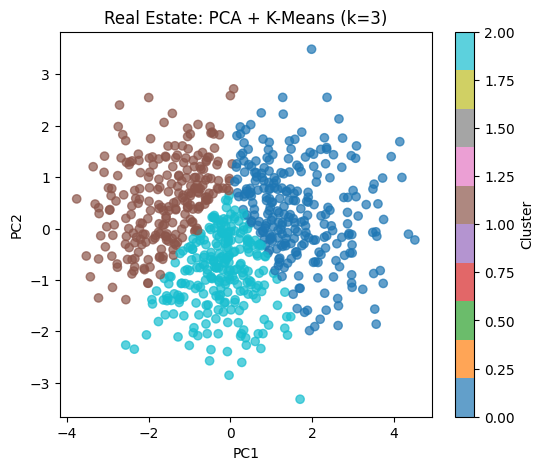

In [10]:
# 5) K-Means on the PCA representation (choose k=3 as example)
kmeans_re = KMeans(n_clusters=3, random_state=42, n_init="auto")
re_clusters = kmeans_re.fit_predict(X_pca)

# 6) Visualize clusters in PCA space
plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=re_clusters,
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Real Estate: PCA + K-Means (k=3)")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [ ]:
"""
3️⃣ Како да ги читаш кластерите?
🔵 Десен кластер (PC1 > 0)

➡ имоти што имаат слични карактеристики меѓу себе
➡ веројатно:

поголема квадратура

повисока цена
(зависи од податоците)

🟤 Лев кластер (PC1 < 0)

➡ друга група со поинаков профил
➡ веројатно:

помали

поевтини имоти

🟢 Долен кластер (PC2 < 0)

➡ трета група
➡ може да претставува:

имоти со различен тип

специфични карактеристики

4️⃣ Што значи преклопување?

📌 Каде што боите се мешаат:

имотите се слични

границата меѓу кластерите не е остра

➡ нормално за реални податоци

5️⃣ ШТО Е ЗАКЛУЧОКОТ? (ова е најважно)

✔ K-Means успешно ги поделил имотите во 3 сегменти
✔ PCA ни дозволува да ги видиме тие сегменти
✔ Кластерите се делумно одвоени, не совршени → реални податоци
"""

In [11]:
# 7) Back-interpret clusters in the original feature space
re_numeric_with_cluster = re_numeric.copy()
re_numeric_with_cluster["cluster"] = re_clusters

re_numeric_with_cluster.groupby("cluster").mean().round(1)

,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
cluster,,,,,,
0,94.4,4.9,3.0,2006.4,3.2,135044.0
1,51.4,2.4,3.6,2004.5,2.9,59654.5
2,69.5,3.5,1.6,2003.8,4.7,86040.2


In [ ]:
#VOA GORE E SAMO ZA NUMERICKI POD A VOD DOLE E ZA MESANI NUM+CATEG

#⚠ PCA и K-Means НЕ работат со текст

### <font color='black'>Another example<font>

In [12]:
loan = pd.read_csv("data/other/loan_data_exam.csv")
loan.sample(10)

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
5283,42477,32.0,female,Master,17728.0,10,RENT,4791.0,EDUCATION,7.37,0.27,8.0,713.0,No,1.0
342,7685,22.0,female,Associate,66013.0,1,MORTGAGE,7000.0,PERSONAL,8.94,0.11,2.0,577.0,No,0.0
4854,13420,24.0,male,NaN,110607.0,1,MORTGAGE,1000.0,HOMEIMPROVEMENT,7.68,0.01,3.0,642.0,Yes,0.0
382,4627,25.0,male,High School,51537.0,0,MORTGAGE,13975.0,VENTURE,8.90,0.27,4.0,653.0,Yes,NaN
4128,3271,22.0,female,NaN,44104.0,0,MORTGAGE,2000.0,PERSONAL,11.01,0.05,4.0,662.0,Yes,0.0
7513,6723,24.0,male,Associate,61177.0,2,MORTGAGE,9000.0,HOMEIMPROVEMENT,7.14,0.15,2.0,610.0,Yes,0.0
1765,11808,26.0,female,Bachelor,102771.0,4,RENT,10000.0,HOMEIMPROVEMENT,11.01,0.10,2.0,662.0,Yes,NaN
169,33045,24.0,male,Bachelor,55250.0,1,RENT,9044.0,EDUCATION,7.25,0.16,4.0,469.0,Yes,0.0
7025,23864,27.0,female,High School,80735.0,3,MORTGAGE,16000.0,HOMEIMPROVEMENT,10.99,0.20,5.0,569.0,Yes,0.0
460,9457,26.0,female,Bachelor,75315.0,2,MORTGAGE,20000.0,MEDICAL,10.38,0.27,4.0,687.0,Yes,0.0


In [13]:
# 1) Drop ID-like columns and rows with missing values (simple approach)
loan = loan.drop(columns=["Unnamed: 0"])
loan = loan.dropna()

# Separate features and label
X_loan = loan.drop(columns=["loan_status"])
y_loan = loan["loan_status"]  # 0/1 or similar

numeric_features = X_loan.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_loan.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_features, categorical_features

(['person_age',
  'person_income',
  'person_emp_exp',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length',
  'credit_score'],
 ['person_gender',
  'person_education',
  'person_home_ownership',
  'loan_intent',
  'previous_loan_defaults_on_file'])

In [18]:
# 2) Build preprocessing: scale numeric, one-hot encode categoricals
preprocess_loan = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_loan_pre = preprocess_loan.fit_transform(X_loan)

# If sparse, convert to dense for PCA onehot vraka sparse a pca ne rab so toa pa mora dense arr
if hasattr(X_loan_pre, "toarray"):
    X_loan_pre = X_loan_pre.toarray()

X_loan_pre.shape

(5854, 27)

In [15]:
# 3) PCA to 2D
pca_loan = PCA(n_components=2, random_state=42)
X_loan_pca = pca_loan.fit_transform(X_loan_pre)

print("Explained variance (2 PCs):",
      pca_loan.explained_variance_ratio_.sum().round(3))

Explained variance (2 PCs): 0.411


/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:341: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:341: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:341: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ana/Library

In [16]:
# 4) K-Means with 2 clusters (because loan_status is binary)
kmeans_loan = KMeans(n_clusters=2, random_state=42, n_init="auto")
loan_clusters = kmeans_loan.fit_predict(X_loan_pca)

# 5) Compare clusters with true labels: Adjusted Rand Index
ari = adjusted_rand_score(y_loan, loan_clusters)
print("Adjusted Rand Index between clusters and loan_status:", round(ari, 3))

Adjusted Rand Index between clusters and loan_status: -0.018


/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:241: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:241: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:241: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_w

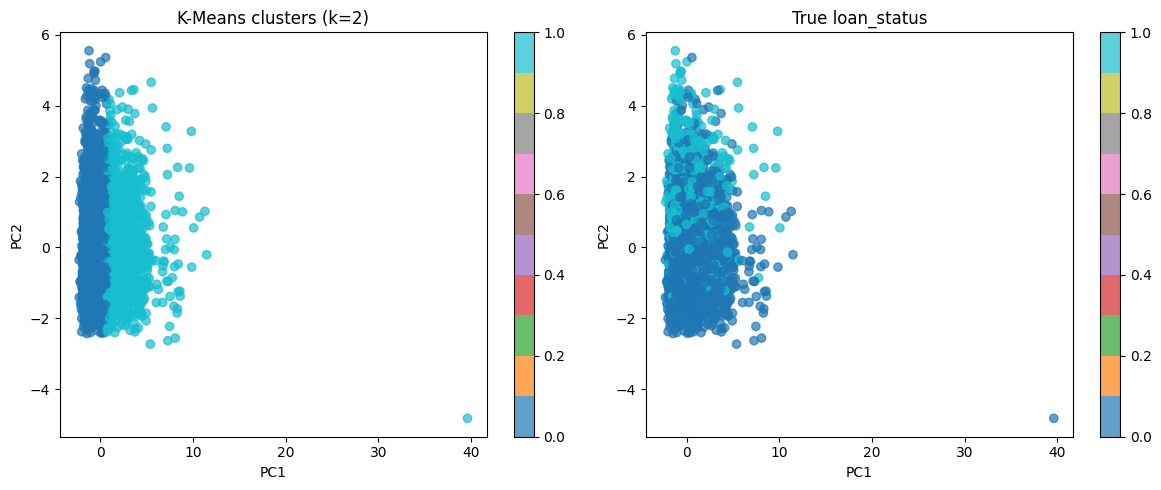

In [17]:
# 6) Visualize: left is colored by UNSUPERVISED clusters,
#    right is colored by TRUE label

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

scatter0 = axes[0].scatter(
    X_loan_pca[:, 0], X_loan_pca[:, 1],
    c=loan_clusters, cmap="tab10", alpha=0.7
)
axes[0].set_title("K-Means clusters (k=2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter0, ax=axes[0])

scatter1 = axes[1].scatter(
    X_loan_pca[:, 0], X_loan_pca[:, 1],
    c=y_loan, cmap="tab10", alpha=0.7
)
axes[1].set_title("True loan_status")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter1, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
"""
| Ситуација          | Пристап                                     |
| ------------------ | ------------------------------------------- |
| Само бројки        | `StandardScaler → PCA`                      |
| Бројки + категории | `ColumnTransformer (Scaler + OneHot) → PCA` |
| Clustering         | После preprocessing                         |
| Визуелизација      | PCA на крај                                 |


Кога dataset-от има мешани нумерички и категоријални карактеристики, се користи ColumnTransformer за скалирање и one-hot енкодирање пред PCA и clustering.
"""


In [ ]:
"""
za slikata:
„Левиот график ги прикажува кластерите добиени со K-Means, а десниот вистинските класи; нивната разлика покажува дека кластерингот не мора да ја реплицира класната поделба.“
Како да ја споредиш левата и десната?
✔ Добар кластеринг

Ако боите се слични на двете слики
→ K-Means добро ја фатил структурата

❌ Лош кластеринг

Ако боите не се поклопуваат
→ кластерите не одговараат на вистинските класи

📌 Кај тебе:

има делумно поклопување

но и многу мешање
→ K-Means не ја реплицира целосно loan_status